# Task - 2: Stock Market Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/HEMANT/Downloads/NSE-TATAGLOBAL11.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [4]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
stk=df.copy()

In [6]:
stk.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [7]:
stk['Date']=pd.to_datetime(stk['Date'])

In [8]:
stk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1235 non-null   datetime64[ns]
 1   Open                  1235 non-null   float64       
 2   High                  1235 non-null   float64       
 3   Low                   1235 non-null   float64       
 4   Last                  1235 non-null   float64       
 5   Close                 1235 non-null   float64       
 6   Total Trade Quantity  1235 non-null   float64       
 7   Turnover (Lacs)       1235 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 77.3 KB


In [9]:
stk.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [10]:
stk['Date'].min()

Timestamp('2013-10-08 00:00:00')

In [11]:
stk['Date'].max()

Timestamp('2018-10-08 00:00:00')

In [12]:
stk['Month Year'] = stk['Date'].apply(lambda x: x.strftime ('%y-%m'))
stk['Year'] = stk['Date'].apply(lambda x: x.strftime ('%y'))
stk.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Month Year,Year
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83,18-10,18
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06,18-10,18
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,18-10,18
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,18-10,18
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,18-10,18


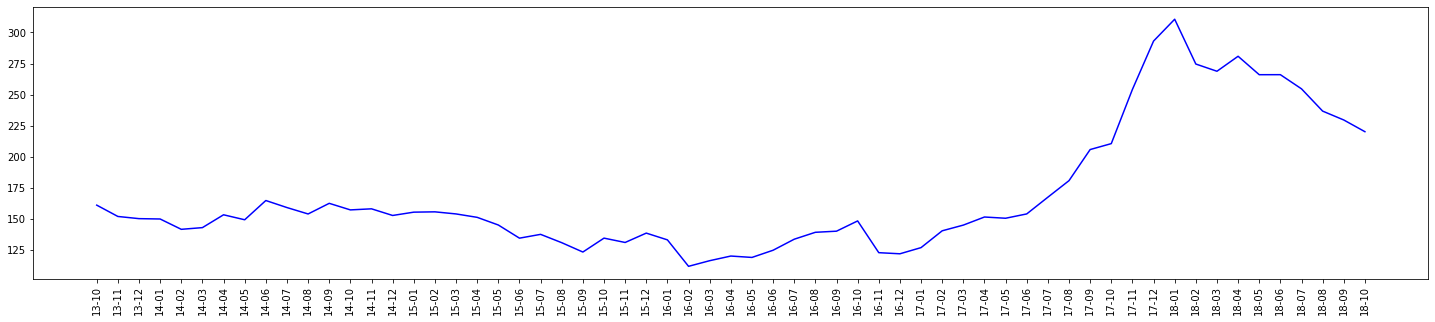

In [13]:
a = stk.groupby('Month Year')['Close'].mean()
plt.figure(figsize=(25,5))
plt.plot(a, color = 'blue')
plt.xticks(rotation = 'vertical')
plt.show()

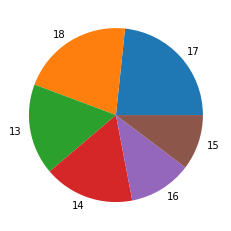

In [14]:
pc = stk[['Year', 'Total Trade Quantity']]
grp_pc = pc.groupby('Year')['Total Trade Quantity'].mean().sort_values(ascending = False).reset_index()
plt.pie(grp_pc['Total Trade Quantity'], labels=grp_pc['Year'])
plt.show()

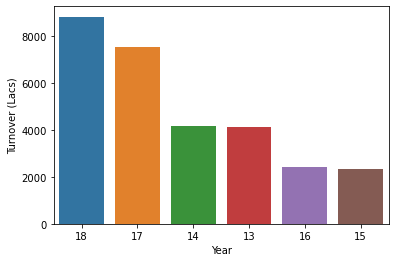

In [15]:
trd = stk[['Year','Turnover (Lacs)']]
a = trd.groupby('Year')['Turnover (Lacs)'].mean().sort_values(ascending = False).reset_index()
sns.barplot(a['Year'], a['Turnover (Lacs)'])
plt.show()

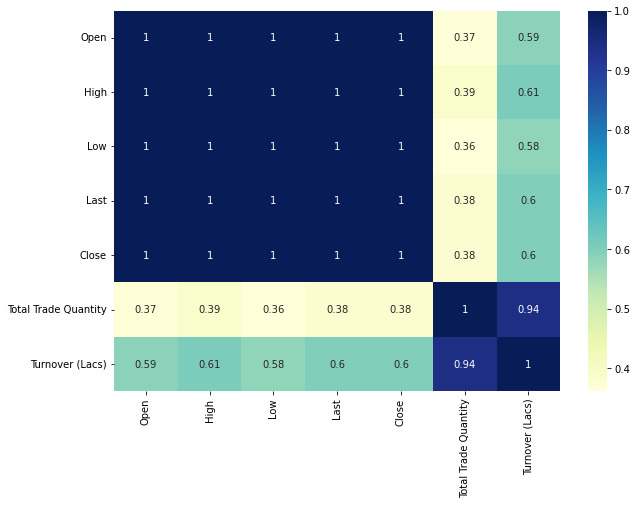

In [16]:
plt.figure(figsize = (10,7))
sns.heatmap(stk.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [17]:
stk.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)', 'Month Year', 'Year'],
      dtype='object')

In [18]:
x = stk[['Close', 'Total Trade Quantity']]
y = stk['Turnover (Lacs)']

In [19]:
x.head()

,Close,Total Trade Quantity
0,215.15,4642146.0
1,209.20,3519515.0
2,218.20,1728786.0
3,227.60,1708590.0
4,230.90,1534749.0


In [20]:
y.head()

0    10062.83
1     7407.06
2     3815.79
3     3960.27
4     3486.05
Name: Turnover (Lacs), dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [22]:
lr=LinearRegression()

In [23]:
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
X_train.shape, X_test.shape

((864, 2), (371, 2))

In [25]:
y_train_pred = lr.predict(X_train)
y_train_pred

array([ 2.72269701e+03,  1.78672079e+03,  7.32520507e+03,  3.44354863e+04,
        1.65146786e+04,  5.11962056e+02,  2.02045298e+04,  1.55698388e+03,
        3.48791100e+03,  1.14450291e+03,  2.08368488e+03,  1.06809534e+04,
        7.00763385e+03,  7.78279381e+03,  6.82305838e+03,  8.42467677e+02,
        1.43498507e+03,  1.58678810e+03,  3.37145509e+03,  3.61808643e+03,
        1.06004751e+04,  3.47277563e+03,  2.61175206e+03,  1.26742207e+03,
        2.92738254e+01,  2.04720594e+04,  4.61222467e+03,  6.54237102e+02,
        8.30492686e+03,  5.50351234e+03,  1.20389692e+03,  1.27820603e+04,
        2.76917506e+03,  9.93703955e+03,  1.00810712e+03,  4.49649235e+03,
        1.72190019e+03,  2.02600993e+03,  3.22825861e+03,  5.61694981e+03,
        1.01276210e+04,  1.68485169e+03,  4.40738998e+03,  7.01636588e+03,
        2.56182278e+03,  4.42592803e+02,  2.47412493e+03,  2.81040637e+03,
        2.80319826e+03,  1.12423615e+03,  3.73550746e+03,  6.32643529e+03,
        8.28509892e+03,  

In [26]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([ 5.94584924e+03,  3.63417037e+03,  2.90275356e+03,  4.84861444e+02,
        8.29084083e+03,  2.18640293e+03,  4.11955765e+03, -1.24310518e+02,
        8.64462304e+02,  1.09610261e+04,  2.35847718e+04,  1.48178544e+03,
        9.05523139e+02,  2.89210483e+03,  7.69574272e+03,  4.34011889e+03,
        5.48747917e+03,  1.30271003e+04,  9.04737218e+03,  3.92345964e+03,
        5.76615348e+03,  1.02603277e+03,  4.76551948e+01,  2.53921892e+03,
        8.22574330e+03,  2.15843551e+02,  1.40809381e+03,  1.15627540e+03,
       -7.31137501e+02,  1.73563520e+02,  3.76280162e+03,  2.40819608e+03,
        1.68467943e+04,  8.75615129e+03,  2.97399177e+03,  2.25374282e+03,
        4.17660482e+03,  9.08929900e+03,  8.73157648e+02,  7.34814818e+02,
        1.34764361e+03,  2.26403225e+03,  1.00300494e+04,  2.73131934e+03,
       -5.06173890e+02,  2.00265344e+03,  2.00394928e+03,  8.77851079e+03,
        9.03408056e+03, -1.13323406e+02,  5.54981640e+03,  3.73925317e+03,
        4.30332974e+03,  

In [27]:
print("R2Score : " ,r2_score(y_test, y_test_pred)) 
print("mean_absolute_error : ",mean_absolute_error(y_test, y_test_pred))
print("mean_squared_error : " ,mean_squared_error(y_test, y_test_pred)) 
print("Root mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2Score :  0.9549409567088774
mean_absolute_error :  746.2906459590122
mean_squared_error :  1111797.450114442
Root mean_squared_error :  1054.4180623047207


In [28]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [29]:
rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train_std,y_train)
rf_tree_y_pred = rf_tree.predict(X_train_std)
print("Accuracy: {}".format(rf_tree.score(X_train_std,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9973841447717356
R squared: 0.9973841447717356
